# Logistic Regression
Classification for obesity.

data soure: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

***

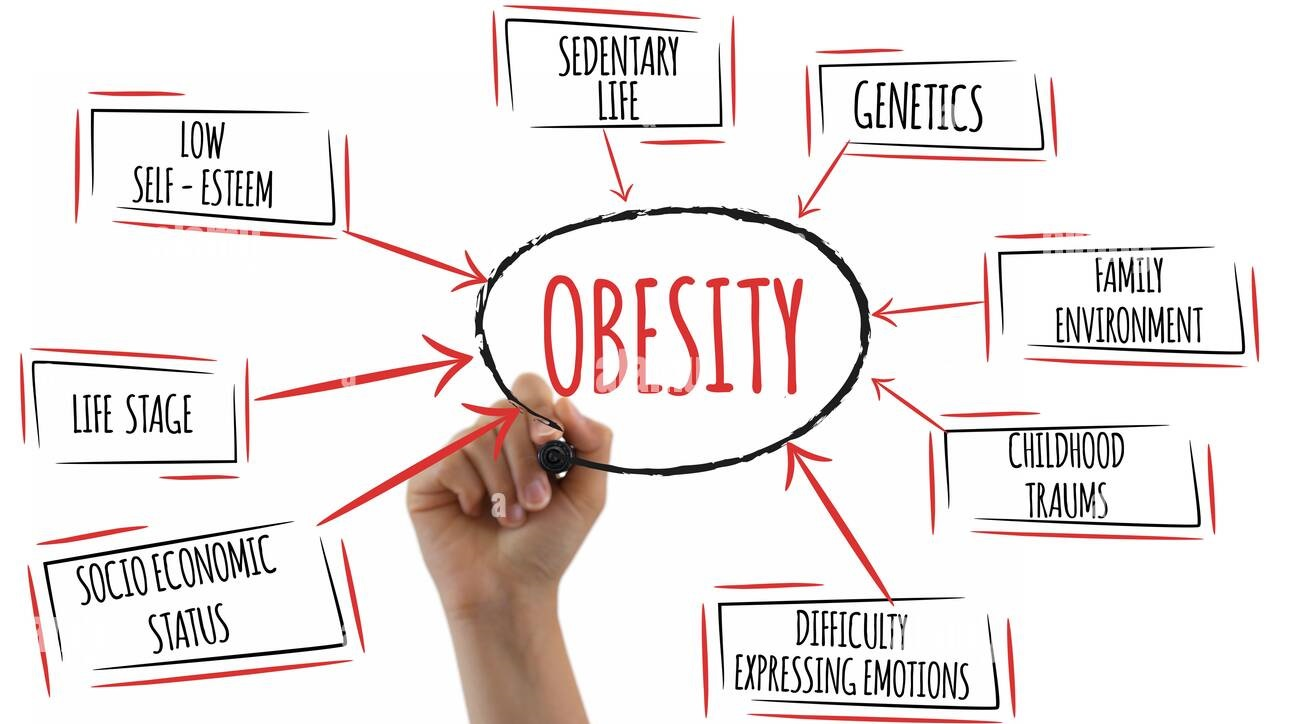



In this project, We will analyze data from a survey conducted by Fabio Mendoza Palechor and Alexis de la Hoz Manotas that asked people about their eating habits and weight. The data was obtained from the [UCI Machine Learning Repository]. Categorical variables were changed to numerical ones in order to facilitate analysis.

First, We will fit a logistic regression model to try to predict whether survey respondents are obese based on their answers to questions in the survey. After that, We will use three different wrapper methods to choose a smaller feature subset.

We will be using `sequential forward selection`, `sequential backward floating selection`, and `recursive feature elimination`. After implementing each wrapper method, We then evaluate the model accuracy on the resulting smaller feature subsets and compare that with the model accuracy using all available features.

# Content

1. Import and Load libraries
2. Preliminary Logistic Regression
   - 2.1 Building a Logistic Regression Model
   - 2.2 Model Evaluation
3. Feature Selection
   - 3.1 Wrapper Methods
   - 3.2 Recursive Feature Elimination
   - 3.2 SelectKBest
4. Final Logistic Regression
   - 4.1 Building Final Logistic Regression Model
   - 4.2 Final Model Evaluation
   - 4.3 Confusion Matrix
   - 4.4 Test Run


`Data Dictionary`

The data set `obesity` contains 18 predictor variables. Here's a brief description of them.

* `Gender` is `1` if a respondent is male and `0` if a respondent is female.
* `Age` is a respondent's age in years.
* `family_history_with_overweight` is `1` if a respondent has family member who is or was overweight, `0` if not.
* `FAVC` is `1` if a respondent eats high caloric food frequently, `0` if not.
* `FCVC` is `1` if a respondent usually eats vegetables in their meals, `0` if not.
* `NCP` represents how many main meals a respondent has daily (`0` for 1-2 meals, `1` for 3 meals, and `2` for more than 3 meals).
* `CAEC` represents how much food a respondent eats between meals on a scale of `0` to `3`.
* `SMOKE` is `1` if a respondent smokes, `0` if not.
* `CH2O` represents how much water a respondent drinks on a scale of `0` to `2`.
* `SCC` is `1` if a respondent monitors their caloric intake, `0` if not.
* `FAF` represents how much physical activity a respondent does on a scale of `0` to `3`.
* `TUE` represents how much time a respondent spends looking at devices with screens on a scale of `0` to `2`.
* `CALC` represents how often a respondent drinks alcohol on a scale of `0` to `3`.
* `Automobile`, `Bike`, `Motorbike`, `Public_Transportation`, and `Walking` indicate a respondent's primary mode of transportation. Their primary mode of transportation is indicated by a `1` and the other columns will contain a `0`.

The outcome variable, `NObeyesdad`, is a `1` if a patient is obese and a `0` if not.

# 1. Load and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, mutual_info_classif, SelectKBest, chi2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("obesity.csv")
df.head(3)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0


# 2. Preliminary Logistic Regression
We will start by building a Logistic Regression with all the features available and comapre it later to our final logistic model with selected features.

### 2.1 Building a Logistic Regression Model

##### Split the data into `X` and `y`

In [3]:
X = df.iloc[:,:-1]
y = df['NObeyesdad']

##### Train Test split
Spliting our data to training 70% and testing 30%.

In [249]:
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.30, random_state = 0)

##### Normalize the Data
Our features must be in the same scale

In [250]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Logistic Regression Model
Include the parameter `max_iter=1000` to make sure that the model will converge when you try to fit it.

In [251]:
lr = LogisticRegression(max_iter=1000)

##### Fit the model

Use the `.fit()` method on `lr` to fit the model to `X` and `y`.

In [252]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### 2.2 Model accuracy

A model's _accuracy_ is the proportion of classes that the model correctly predicts. is Compute and print the accuracy of `lr` by using the `.score()` method. What percentage of respondents did the model correctly predict as being either obese or not obese? You may want to write this number down somewhere so that you can refer to it during future tasks.

In [253]:
# Setting y_pred variable as our predictions for the x_test data
y_pred = lr.predict(x_test)

In [254]:
# .score() function is also the accuracy_score fuction
# lr.score(x_test, y_test)

In [255]:
# Setting variables, we will need this later for comparison
Accuracy1  = accuracy_score(y_test, y_pred)
Precision1 = precision_score(y_test, y_pred)
Recall1    = recall_score(y_test, y_pred)
F1_score1  = f1_score(y_test, y_pred)
print('Accuracy : {}\n'
      'Precision: {}\n'
      'Recall   : {}\n'
      'F1_score : {}\n'      
      .format(Accuracy1, Precision1, Recall1, F1_score1))

Accuracy : 0.777602523659306
Precision: 0.7142857142857143
Recall   : 0.8673469387755102
F1_score : 0.783410138248848



# 3. Feature Selection
Evaluating a Logistic Regression Model

### 3.1 Wrapper Methods

Now that we've created a logistic regression model and evaluated its performance, we're ready to do some feature selection. 

This function takes two parameters. Using the SFFS ans SBFS method.

1. `k` the number of features
2. `scoring`;
 - for classifiers {'accuracy', 'f1', 'precision', 'recall', 'roc_auc'}
 - for regressors  {'mean_absolute_error', 'mean_squared_error'/'neg_mean_squared_error', 'median_absolute_error', 'r2'}
 
Note: We're fitting the the X and y variables here instead of the training data set. 

In [ ]:
scoring_method = 

In [256]:
def F_select_wrapper(k,scoring):
    # Sequesntial forward Floating Selection
    sffs = SFS(lr,
          k_features=k,
          forward= True,
          floating= True,
          scoring=scoring,
          cv=0)
    sffs.fit(X, y)
    print('SFFS Result:')
    print(sffs.subsets_[k]['feature_names'])
    print(sffs.subsets_[k]['avg_score'])
    
    # Visualize in DataFrame (Optional, Uncomment to view)
    # pd.DataFrame.from_dict(ssfs.get_metric_dict()).T
    
    # Visualize
    fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
    plt.title('Sequential Forward Floating Selection (w. StdDev)')
    plt.grid()
    plt.show()
    
    #########################################################
    # Sequesntial Backward Floating Selection
    sbfs = SFS(lr,
              k_features=k,
              forward= False,
              floating= True,
              scoring=scoring,
              cv=0)
    sbfs.fit(X, y)
    print('\nSBFS Result:')
    print(sbfs.subsets_[k]['feature_names'])
    print(sbfs.subsets_[k]['avg_score'])

    #Visualize
    fig2 = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')
    plt.title('Sequential Backward Floating Selection (w. StdDev)')
    plt.grid()
    plt.show()

SFFS Result:
('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Motorbike', 'Walking')
0.7835149218379914


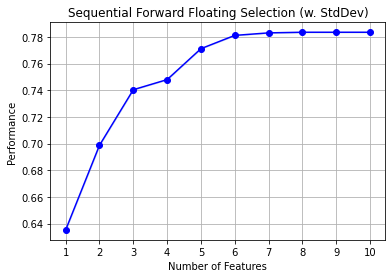


SBFS Result:
('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'Walking')
0.7806726669824727


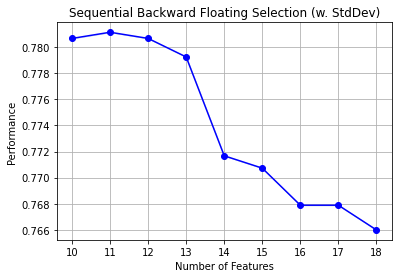

In [208]:
F_select_wrapper(10, 'accuracy')

Saving the SFFS and SBSF selected features

In [209]:
X_SFFS = [['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Motorbike', 'Walking']]
X_SBFS = [['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'Walking']]

### 3.2 RFE
Ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

Before doing applying recursive feature elimination it is necessary to standardize the data.

In [210]:
def F_select_rfe (k):
    # Setting a varible 'X_standard' so that our original X features will remain unaffected
    # if we rerun this code
    X_standard = StandardScaler().fit_transform(X)
    
    rfe = RFE(lr, n_features_to_select=k)
    
    rfe.fit(X_standard,y)
    
    rfe_features = [f for (f, support) in zip(df.iloc[:,:-1], rfe.support_) if support]
    print('\nRFE Result:')
    print(rfe_features)
    print(rfe.score(X_standard,y))
    
    rfe_features_df = pd.DataFrame({'features': X.columns,
                                         'ranking': rfe.ranking_})   
    return rfe_features_df.sort_values(by=(['ranking']))    

In [211]:
F_select_rfe(10)


RFE Result:
['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'CH2O', 'SCC', 'FAF', 'Automobile', 'Walking']
0.7664613927048792


,features,ranking
8,CH2O,1
13,Automobile,1
10,FAF,1
9,SCC,1
6,CAEC,1
17,Walking,1
4,FCVC,1
3,FAVC,1
2,family_history_with_overweight,1
1,Age,1


In [212]:
X_rfe = [['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'CH2O', 'SCC', 'FAF', 'Automobile', 'Walking']]

### 3.3 SelectKBest

Select K Best most common test methods;

`f_classif`
ANOVA F-value between label/feature for classification tasks.

`mutual_info_classif`
Mutual information for a discrete target.

`chi2`
Chi-squared stats of non-negative features for classification tasks.

`f_regression`
F-value between label/feature for regression tasks.

`mutual_info_regression`
Mutual information for a continuous target.

We will be using the `chi2` and `mutual_info_classif` for this test

In [4]:
def F_select_kbest(test_method, num_feature):
    # because we want to specify additional arguments (random_state=0) 
    # besides the features and targets inputs, we’ll need the help of the partial()
#     score_function = partial(test_method, random_state=0)

    selection = SelectKBest(score_func = test_method , k = num_feature)
 
    # fit the fata    
    selection.fit_transform(X, y)
    return X[X.columns[selection.get_support(indices=True)]]

Saving Chi2 and mutual info classif in a variable

In [9]:
# Function call
X_Chi2 = F_select_kbest(chi2, 10)

In [276]:
# Function Call
X_mutual_info_classif = F_select_kbest(mutual_info_classif, 10)

# 4. Final Logistic Regression
Logistic Regression with `selected fearutes`.

### 4.1 Building Final Logistic Regression

In [12]:
# X = df[['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Motorbike', 'Walking']]
# # selectKBest mutaul info class
# # X = df[['Gender','Age','family_history_with_overweight','FAVC','CAEC','FAF','Bike']]
X = X_Chi2

y = df['NObeyesdad']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.30, random_state = 0)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
lr = LogisticRegression(max_iter=1000)

In [17]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### 4.2 Model Evaluation

In [18]:
y_pred = lr.predict(x_test)

In [19]:
Accuracy2  = accuracy_score(y_test, y_pred)
Precision2 = precision_score(y_test, y_pred)
Recall2    = recall_score(y_test, y_pred)
F1_score2  = f1_score(y_test, y_pred)

In [20]:
pd.DataFrame([['accuracy',  Accuracy1,  Accuracy2,  Accuracy2  - Accuracy1  ],
              ['precision', Precision1, Precision2, Precision2 - Precision1 ],
              ['recall',    Recall1,    Recall2,    Recall2    - Recall1    ],  
              ['f1_score',  F1_score1,  F1_score2,  F1_score2  - F1_score1  ]],
            
              columns= ['Score', 'Preliminary', 'Final', 'Difference'])

NameError: name 'Accuracy1' is not defined

### 4.3 Confusion Matrix

<AxesSubplot:>

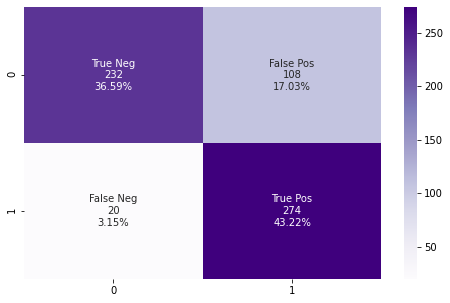

In [31]:
# Visualize
fig, ax = plt.subplots(figsize=(8,5))

# setting variables
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in model_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in model_matrix.flatten()/np.sum(model_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(model_matrix, annot=labels, fmt='', cmap='Purples')

### 4.4 Test Run

In [54]:
# calling our dataset for reference
df[['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Motorbike', 'Walking', 'NObeyesdad']].head(2)

,Gender,Age,family_history_with_overweight,FAVC,CAEC,SCC,FAF,Bike,Motorbike,Walking,NObeyesdad
0,0,21.0,1,0,1,0,0.0,0,0,0,0
1,0,21.0,1,0,1,1,3.0,0,0,0,0


In [55]:
# setting variable for alyx
alyx = [[0,21,1,0,1,0,0,0,0,0]]
alyx = scaler.transform(alyx)

lr.predict(alyx)

array([0], dtype=int64)

In [85]:
from scipy.stats import chi2_contingency
from functools import partial

In [103]:
# because we want to specify additional arguments (random_state=0) 
# besides the features and targets inputs, we’ll need the help of the partial()
score_function = partial(chi2)

selection = SelectKBest(score_func = score_function, k=7)
 
# fit the fata    
selection.fit_transform(X, y)

array([[21.      ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [21.      ,  1.      ,  0.      , ...,  1.      ,  3.      ,
         0.      ],
       [23.      ,  1.      ,  0.      , ...,  0.      ,  2.      ,
         0.      ],
       ...,
       [22.524036,  1.      ,  1.      , ...,  0.      ,  1.414209,
         0.      ],
       [24.361936,  1.      ,  1.      , ...,  0.      ,  1.139107,
         0.      ],
       [23.664709,  1.      ,  1.      , ...,  0.      ,  1.026452,
         0.      ]])

In [106]:
X[X.columns[selection.get_support(indices=True)]].head(1)

,Age,family_history_with_overweight,FAVC,CAEC,SCC,FAF,Walking
0,21.0,1,0,1,0,0.0,0
